In [86]:
import pandas as pd
import re
import matplotlib.pyplot as plt

Acurácias obtidas na execução do TURTLE com os diferentes modelos de extração de características

In [141]:
acc_stl9_resnet18 = 0.9335
acc_cifar9_resnet18 = 0.7326

acc_stl9_vgg11 = 0.9163
acc_cifar9_vgg11 = 0.5187

acc_stl9_dialnet = 0.7890
acc_cifar9_dialnet = 0.6616

acc_stl9_resnet18_vgg11 = 0.9364
acc_cifar9_resnet18_vgg11 = 0.6239

acc_stl9_dialnet_resnet18 = 0.9285
acc_cifar9_dialnet_resnet18 = 0.7881

acc_stl9_dialnet_vgg11 = 0.9175
acc_cifar9_dialnet_vgg11 = 0.7417

acc_stl9_dialnet_resnet18_vgg11 = 0.9363
acc_cifar9_dialnet_resnet18_vgg11 = 0.7677

acc_stl9 = [
    acc_stl9_resnet18,
    acc_stl9_vgg11,
    acc_stl9_dialnet,
    acc_stl9_resnet18_vgg11,
    acc_stl9_dialnet_resnet18,
    acc_stl9_dialnet_vgg11,
    acc_stl9_dialnet_resnet18_vgg11
]

acc_cifar9 = [
    acc_cifar9_resnet18,
    acc_cifar9_vgg11,
    acc_cifar9_dialnet,
    acc_cifar9_resnet18_vgg11,
    acc_cifar9_dialnet_resnet18,
    acc_cifar9_dialnet_vgg11,
    acc_cifar9_dialnet_resnet18_vgg11
]



Função para definir melhores hiperparâmetros com base na média de acurácia

In [88]:
def melhores_hiperparametros_medios(df):
    # Agrupa por hiperparâmetros
    df_media = df.groupby(["lr", "gamma", "epochs"])["acc"].mean().reset_index()

    # Seleciona a combinação com maior média de acurácia
    melhor_acuracia = df_media.loc[df_media["acc"].idxmax()]

    # Retorna apenas lr, gamma e epochs
    mask = (
        (df["lr"] == melhor_acuracia["lr"]) &
        (df["gamma"] == melhor_acuracia["gamma"]) &
        (df["epochs"] == melhor_acuracia["epochs"])
    )

    return df[mask]

Ajuste dos dados: extrair porcentagem ou valor absoluto; definir quais porcentagens e valores absolutos considerar

In [89]:

def ajuste_dados(df):
    df = df.copy()
    df["strategy"] = df["strategy"].replace({"uncertain": "toprank"})

    # Separar Kabs e Kpct
    df_pct = df[df["K"].str.startswith("Kpct")]
    df_abs = df[df["K"].str.startswith("Kabs")]

    def extract_number(k):
        return float(re.findall(r"[-+]?\d*\.?\d+", k)[0])
    

    df_pct = df_pct.assign(K_value=df_pct["K"].apply(extract_number)).sort_values("K_value")
    df_abs = df_abs.assign(K_value=df_abs["K"].apply(extract_number)).sort_values("K_value")


    df_pct = df_pct[df_pct["K_value"].isin([1, 10, 20])].reset_index(drop=True)
    df_abs = df_abs[df_abs["K_value"].isin([10, 100, 1000])].reset_index(drop=True)


    

    return df_abs, df_pct

    

Carregar resultados do ajuste fino

In [90]:
df_stl9_resnet18 = pd.read_csv("grid_search_results/grid_results_stl9_resnet18_0.csv", sep=",")
df_stl9_vgg11 = pd.read_csv("grid_search_results/grid_results_stl9_vgg11_0.csv", sep=",")
df_stl9_dialnet = pd.read_csv("grid_search_results/grid_results_stl9_dialnet_0.csv", sep=",")
df_stl9_resnet18_vgg11 = pd.read_csv("grid_search_results/grid_results_stl9_resnet18_vgg11_0.csv", sep=",")
df_stl9_dialnet_vgg11 = pd.read_csv("grid_search_results/grid_results_stl9_dialnet_vgg11_0.csv", sep=",")
df_stl9_dialnet_resnet18 = pd.read_csv("grid_search_results/grid_results_stl9_dialnet_resnet18_0.csv", sep=",")
df_stl9_dialnet_resnet18_vgg11 = pd.read_csv("grid_search_results/grid_results_stl9_dialnet_resnet18_vgg11_0.csv", sep=",")


df_cifar9_resnet18 = pd.read_csv("grid_search_results/grid_results_cifar9_resnet18_0.csv", sep=",")
df_cifar9_vgg11 = pd.read_csv("grid_search_results/grid_results_cifar9_vgg11_0.csv", sep=",")
df_cifar9_dialnet = pd.read_csv("grid_search_results/grid_results_cifar9_dialnet_0.csv", sep=",")
df_cifar9_resnet18_vgg11 = pd.read_csv("grid_search_results/grid_results_cifar9_resnet18_vgg11_0.csv", sep=",")
df_cifar9_dialnet_vgg11 = pd.read_csv("grid_search_results/grid_results_cifar9_dialnet_vgg11_0.csv", sep=",")
df_cifar9_dialnet_resnet18 = pd.read_csv("grid_search_results/grid_results_cifar9_dialnet_resnet18_0.csv", sep=",")
df_cifar9_dialnet_resnet18_vgg11 = pd.read_csv("grid_search_results/grid_results_cifar9_dialnet_resnet18_vgg11_0.csv", sep=",")


#Calcular melhores hiperparâmetros com base nas acurácias com diferentes arquiteturas (ResNet-18, VGG-11, DIALNet) e conjuntos de dados (CIFAR-9, STL-9)
df_concat = pd.concat([
    df_stl9_resnet18,
    df_stl9_vgg11,
    df_stl9_dialnet,
		df_stl9_resnet18_vgg11,
		df_stl9_dialnet_vgg11,
		df_stl9_dialnet_resnet18,
		df_stl9_dialnet_resnet18_vgg11,
        
    df_cifar9_resnet18,
    df_cifar9_vgg11,
    df_cifar9_dialnet,
		df_cifar9_resnet18_vgg11,
		df_cifar9_dialnet_vgg11,
		df_cifar9_dialnet_resnet18,
		df_cifar9_dialnet_resnet18_vgg11
])

melhores_hiperparametros = melhores_hiperparametros_medios(df_concat)


In [91]:
df_stl9_resnet18_newTask = pd.read_csv("grid_search_results/grid_results_stl9_resnet18_1.csv", sep=",")
df_stl9_vgg11_newTask = pd.read_csv("grid_search_results/grid_results_stl9_vgg11_1.csv", sep=",")
df_stl9_dialnet_newTask = pd.read_csv("grid_search_results/grid_results_stl9_dialnet_1.csv", sep=",")
df_stl9_resnet18_vgg11_newTask = pd.read_csv("grid_search_results/grid_results_stl9_resnet18_vgg11_1.csv", sep=",")
df_stl9_dialnet_vgg11_newTask = pd.read_csv("grid_search_results/grid_results_stl9_dialnet_vgg11_1.csv", sep=",")
df_stl9_dialnet_resnet18_newTask = pd.read_csv("grid_search_results/grid_results_stl9_dialnet_resnet18_1.csv", sep=",")
df_stl9_dialnet_resnet18_vgg11_newTask = pd.read_csv("grid_search_results/grid_results_stl9_dialnet_resnet18_vgg11_1.csv", sep=",")


df_cifar9_resnet18_newTask = pd.read_csv("grid_search_results/grid_results_cifar9_resnet18_1.csv", sep=",")
df_cifar9_vgg11_newTask = pd.read_csv("grid_search_results/grid_results_cifar9_vgg11_1.csv", sep=",")
df_cifar9_dialnet_newTask = pd.read_csv("grid_search_results/grid_results_cifar9_dialnet_1.csv", sep=",")
df_cifar9_resnet18_vgg11_newTask = pd.read_csv("grid_search_results/grid_results_cifar9_resnet18_vgg11_1.csv", sep=",")
df_cifar9_dialnet_vgg11_newTask = pd.read_csv("grid_search_results/grid_results_cifar9_dialnet_vgg11_1.csv", sep=",")
df_cifar9_dialnet_resnet18_newTask = pd.read_csv("grid_search_results/grid_results_cifar9_dialnet_resnet18_1.csv", sep=",")
df_cifar9_dialnet_resnet18_vgg11_newTask = pd.read_csv("grid_search_results/grid_results_cifar9_dialnet_resnet18_vgg11_1.csv", sep=",")



df_all_newTask = pd.concat([
    df_stl9_resnet18_newTask,
    df_stl9_vgg11_newTask,
    df_stl9_dialnet_newTask,
		df_stl9_resnet18_vgg11_newTask,
		df_stl9_dialnet_vgg11_newTask,
		df_stl9_dialnet_resnet18_newTask,
		df_stl9_dialnet_resnet18_vgg11_newTask,
        
    df_cifar9_resnet18_newTask,
    df_cifar9_vgg11_newTask,
    df_cifar9_dialnet_newTask,
		df_cifar9_resnet18_vgg11_newTask,
		df_cifar9_dialnet_vgg11_newTask,
		df_cifar9_dialnet_resnet18_newTask,
		df_cifar9_dialnet_resnet18_vgg11_newTask
])

melhores_hiperparametros_newTask = melhores_hiperparametros_medios(df_all_newTask)


Selecionar dados com base nos melhores hiperparâmetros

In [99]:

melhor_lr = melhores_hiperparametros.iloc[0]["lr"]
melhor_gamma  = melhores_hiperparametros.iloc[0]["gamma"]
melhor_epocas = melhores_hiperparametros.iloc[0]["epochs"]

melhor_lr_newTask = melhores_hiperparametros_newTask.iloc[0]["lr"]
melhor_gamma_newTask  = melhores_hiperparametros_newTask.iloc[0]["gamma"]
melhor_epocas_newTask = melhores_hiperparametros_newTask.iloc[0]["epochs"]

def selecionar_dados(df, df_newTask):
  df = df[(df["lr"] == melhor_lr) &
			(df["gamma"] == melhor_gamma) &
			(df["epochs"] == melhor_epocas)
			]
  
  df_newTask = df_newTask[(df_newTask["lr"] == melhor_lr_newTask) &
			(df_newTask["gamma"] == melhor_gamma_newTask) &
			(df_newTask["epochs"] == melhor_epocas_newTask)
			]
  return df, df_newTask
	

##	Gráficos

In [117]:
def plot_acuracias(
    *dfs,
    title_prefix1="", title_prefix2="", title_prefix3="",
    baseline1=None, baseline2=None, baseline3=None
):

    # Quantidade de DataFrames passados
    n = len(dfs)

    if n == 0:
        raise ValueError("Você deve passar pelo menos um DataFrame.")

    # Preenche até 3 DataFrames com None
    dfs = list(dfs) + [None] * (3 - n)

    df1, df2, df3 = dfs

    # Ajuste dos títulos de acordo com quantos gráficos existirão
    titles = [title_prefix1, title_prefix2, title_prefix3][:n]
    baselines = [baseline1, baseline2, baseline3][:n]

    # Ajuste dos dados (para cada df existente)
    ajustados = []
    for df in [df1, df2, df3][:n]:
        df_abs, df_pct = ajuste_dados(df)
        ajustados.append((df_abs, df_pct))

    name_map = {"random": "Aleatória", "toprank": "Mais Incertas", "uniform": "Uniforme"}
    strategies = ["random", "toprank", "uniform"]

    # ---------------------------------------------------------
    # 1) GRÁFICOS EM PORCENTAGEM
    # ---------------------------------------------------------
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))
    if n == 1: 
        axes = [axes]

    for ax, (df_abs, df_pct), title, baseline in zip(axes, ajustados, titles, baselines):
        for strat in strategies:
            subset = df_pct[df_pct["strategy"] == strat]
            ax.plot(subset["K_value"], subset["acc"], marker="o", label=name_map[strat])

        if baseline is not None:
            ax.axhline(baseline, linestyle="--", linewidth=1.2,
                       label=f"TURTLE ({baseline:.3f})")

        ax.set_title(title)
        ax.set_xlabel("K (%)")
        ax.set_ylabel("Acurácia")
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # 2) GRÁFICOS ABSOLUTOS
    # ---------------------------------------------------------
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 4))
    if n == 1: 
        axes = [axes]

    for ax, (df_abs, df_pct), title, baseline in zip(axes, ajustados, titles, baselines):
        for strat in strategies:
            subset = df_abs[df_abs["strategy"] == strat]
            ax.plot(subset["K_value"], subset["acc"], marker="o", label=name_map[strat])

        if baseline is not None:
            ax.axhline(baseline, linestyle="--", linewidth=1.2,
                       label=f"TURTLE ({baseline:.3f})")

        ax.set_title(title)
        ax.set_xlabel("K (absoluto)")
        ax.set_xscale("log")
        ax.set_ylabel("Acurácia")
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()


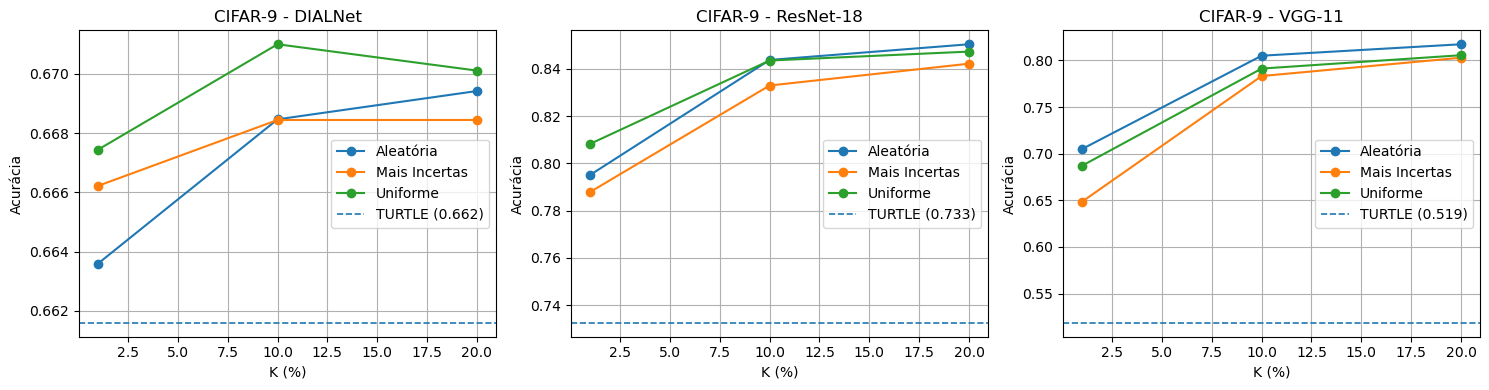

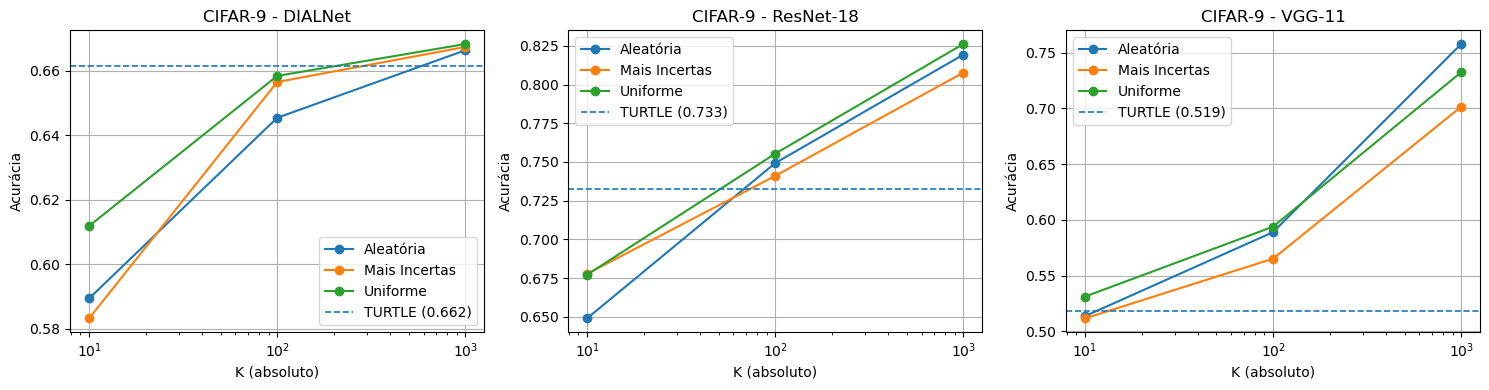

In [120]:

strategy_cifar9_dialnet, strategy_cifar9_dialnet_newTask = selecionar_dados(df_cifar9_dialnet, df_cifar9_dialnet_newTask)
strategy_cifar9_resnet18, strategy_cifar9_resnet18_newTask = selecionar_dados(df_cifar9_resnet18, df_cifar9_resnet18_newTask)
strategy_cifar9_vgg11, strategy_cifar9_vgg11_newTask = selecionar_dados(df_cifar9_vgg11, df_cifar9_vgg11_newTask)

plot_acuracias(
    strategy_cifar9_dialnet,
    strategy_cifar9_resnet18,
    strategy_cifar9_vgg11,
    title_prefix1="CIFAR-9 - DIALNet",
    title_prefix2="CIFAR-9 - ResNet-18",
    title_prefix3="CIFAR-9 - VGG-11",
    baseline1=acc_cifar9_dialnet,
    baseline2=acc_cifar9_resnet18,
    baseline3=acc_cifar9_vgg11
)



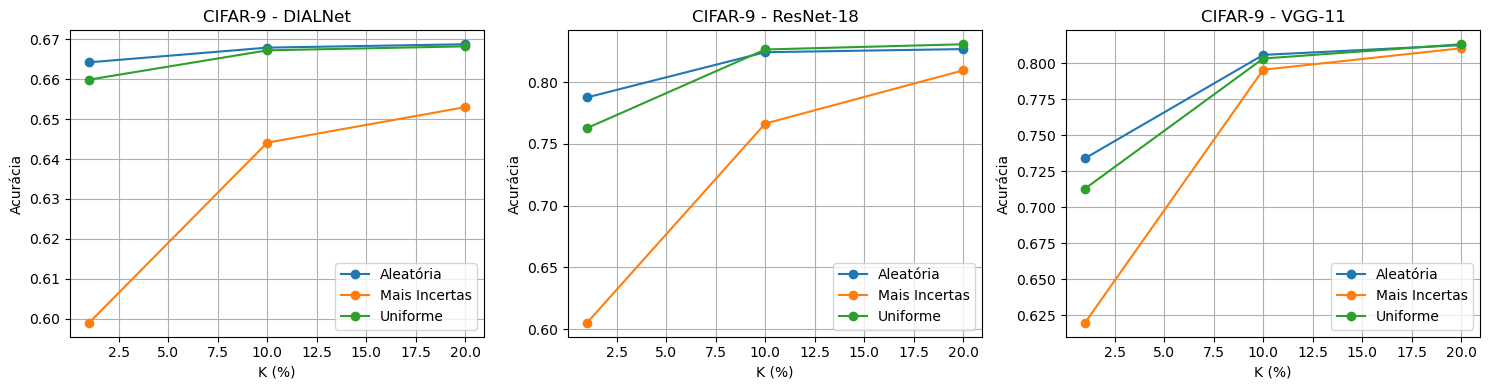

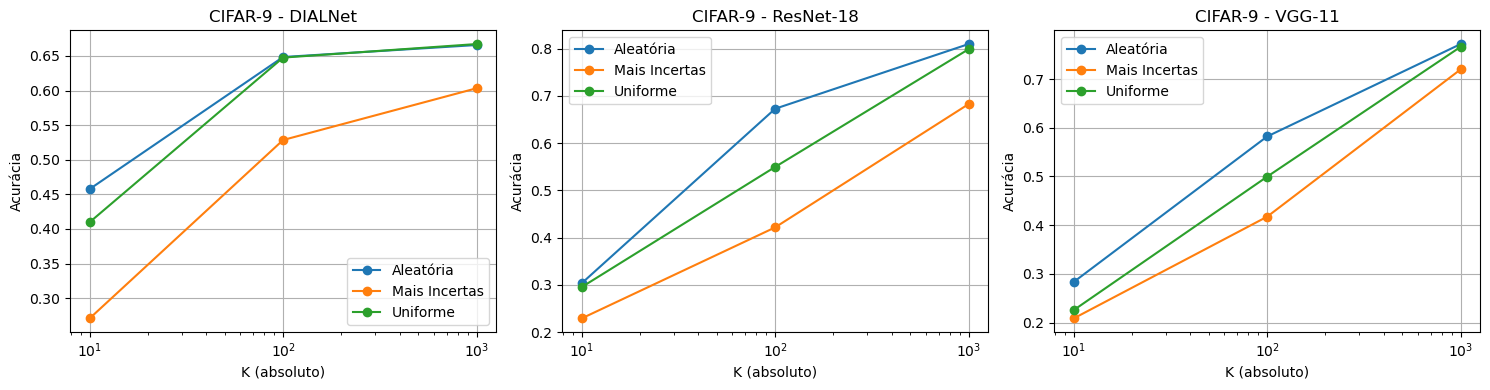

In [119]:
plot_acuracias(
    strategy_cifar9_dialnet_newTask,
    strategy_cifar9_resnet18_newTask,
    strategy_cifar9_vgg11_newTask,
    title_prefix1="CIFAR-9 - DIALNet",
    title_prefix2="CIFAR-9 - ResNet-18",
    title_prefix3="CIFAR-9 - VGG-11"
)

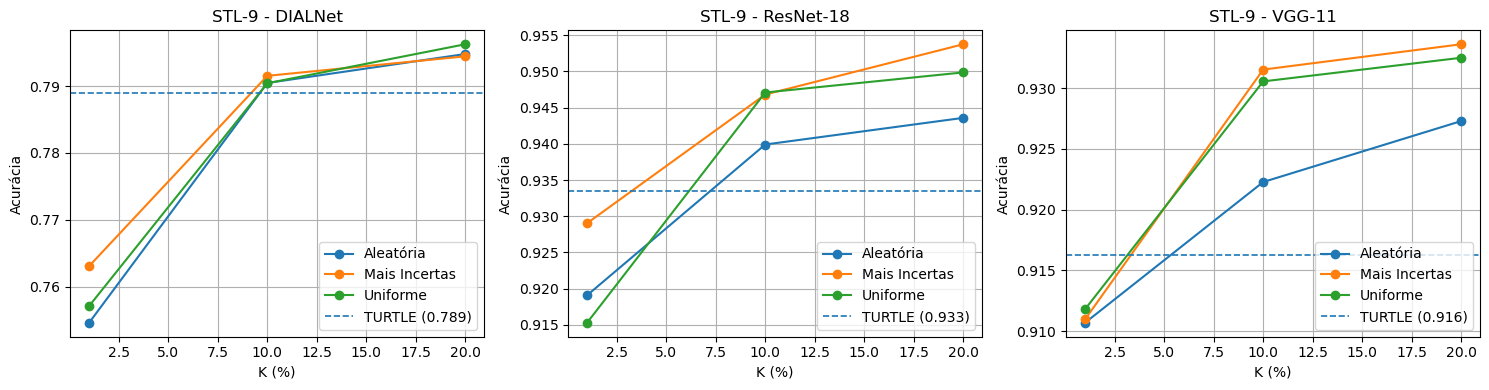

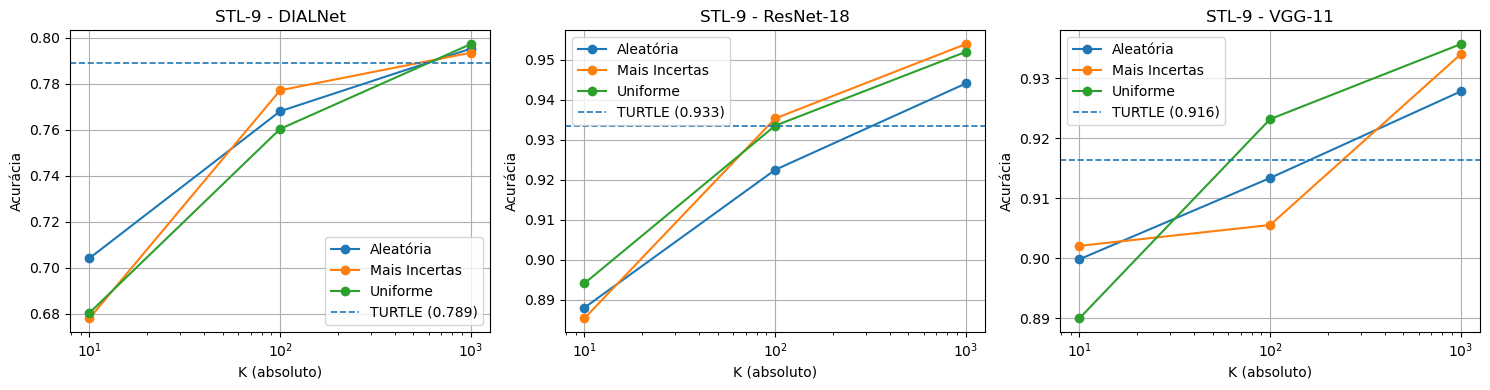

In [121]:

strategy_stl9_dialnet, strategy_stl9_dialnet_newTask = selecionar_dados(df_stl9_dialnet, df_stl9_dialnet_newTask)
strategy_stl9_resnet18, strategy_stl9_resnet18_newTask = selecionar_dados(df_stl9_resnet18, df_stl9_resnet18_newTask)
strategy_stl9_vgg11, strategy_stl9_vgg11_newTask = selecionar_dados(df_stl9_vgg11, df_stl9_vgg11_newTask)

plot_acuracias(
    strategy_stl9_dialnet,
    strategy_stl9_resnet18,
    strategy_stl9_vgg11,
    
		title_prefix1="STL-9 - DIALNet",
    title_prefix2="STL-9 - ResNet-18",
    title_prefix3="STL-9 - VGG-11",

    baseline1=acc_stl9_dialnet,
    baseline2=acc_stl9_resnet18,
    baseline3=acc_stl9_vgg11,
)



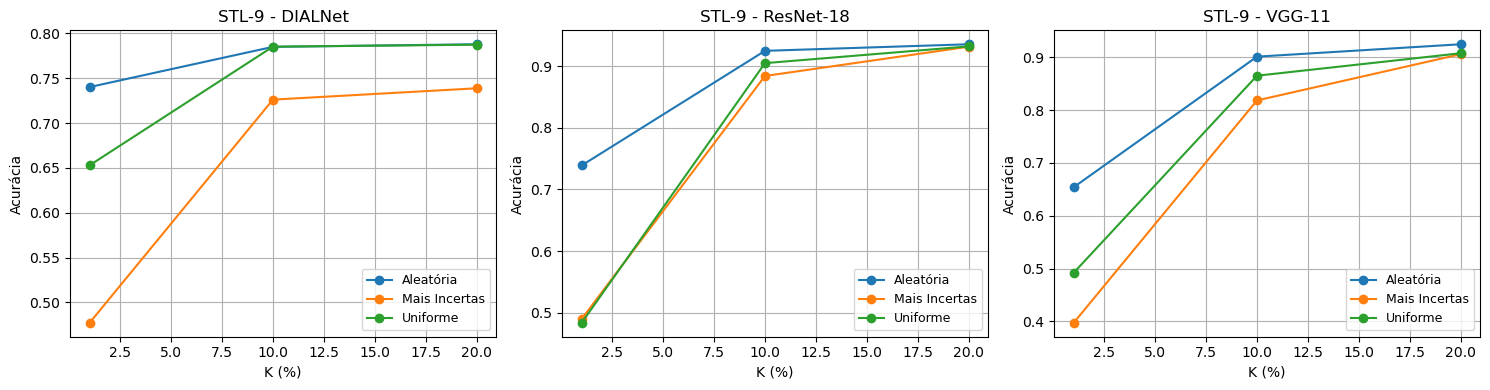

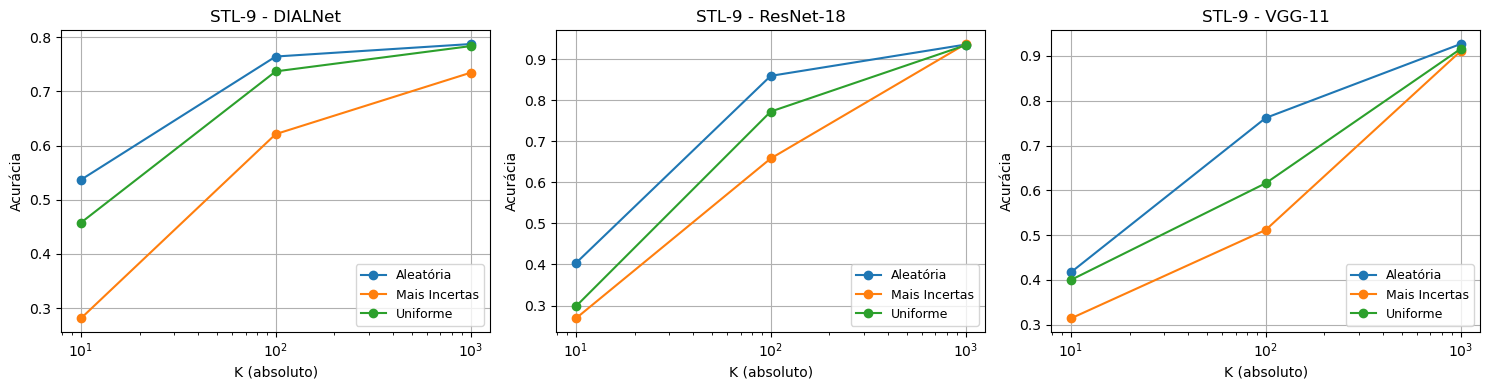

In [110]:
plot_acuracias(
    strategy_stl9_dialnet_newTask,
    strategy_stl9_resnet18_newTask,
    strategy_stl9_vgg11_newTask,
    title_prefix1="STL-9 - DIALNet",
    title_prefix2="STL-9 - ResNet-18",
    title_prefix3="STL-9 - VGG-11"
)


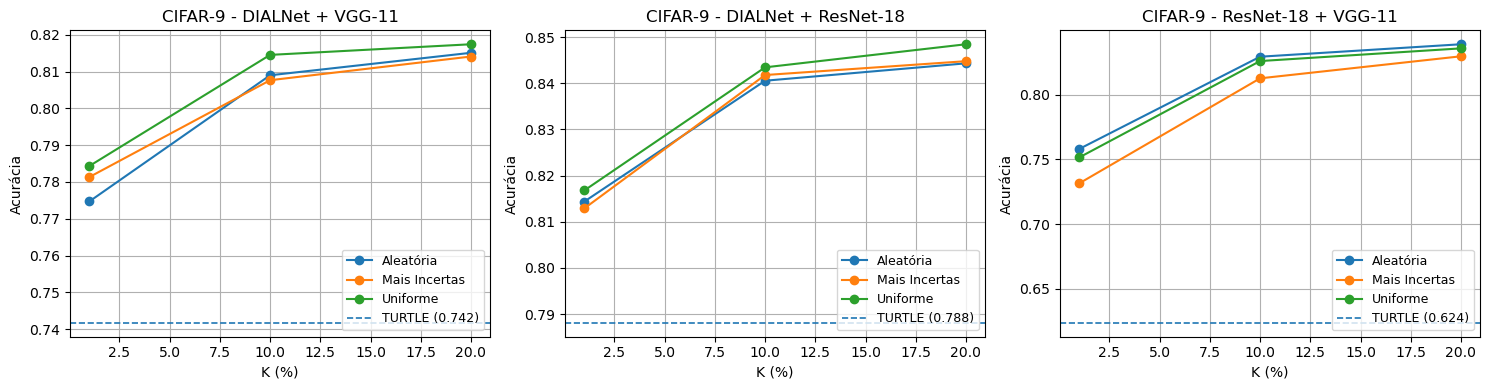

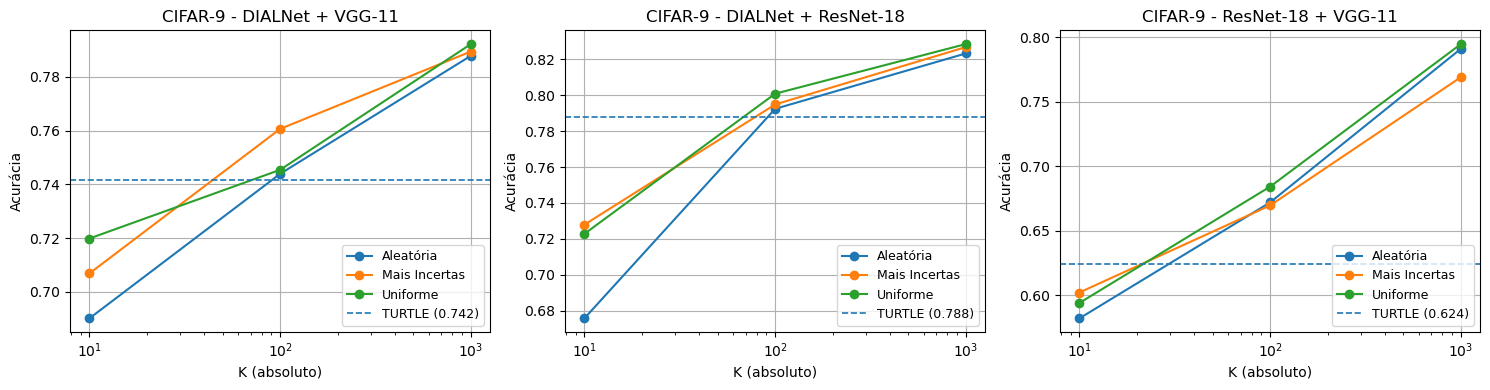

In [111]:

strategy_cifar9_dialnet_vgg11, strategy_cifar9_dialnet_vgg11_newTask = selecionar_dados(df_cifar9_dialnet_vgg11, df_cifar9_dialnet_newTask)
strategy_cifar9_dialnet_resnet18, strategy_cifar9_dialnet_resnet18_newTask = selecionar_dados(df_cifar9_dialnet_resnet18, df_cifar9_dialnet_resnet18_newTask)
strategy_cifar9_resnet18_vgg11, strategy_cifar9_resnet18_vgg11_newTask = selecionar_dados(df_cifar9_resnet18_vgg11, df_cifar9_resnet18_vgg11_newTask)

plot_acuracias(
    strategy_cifar9_dialnet_vgg11,
    strategy_cifar9_dialnet_resnet18,
    strategy_cifar9_resnet18_vgg11,

    "CIFAR-9 - DIALNet + VGG-11",
    "CIFAR-9 - DIALNet + ResNet-18",
    "CIFAR-9 - ResNet-18 + VGG-11",
    
		acc_cifar9_dialnet_vgg11,
    acc_cifar9_dialnet_resnet18,
    acc_cifar9_resnet18_vgg11,
)


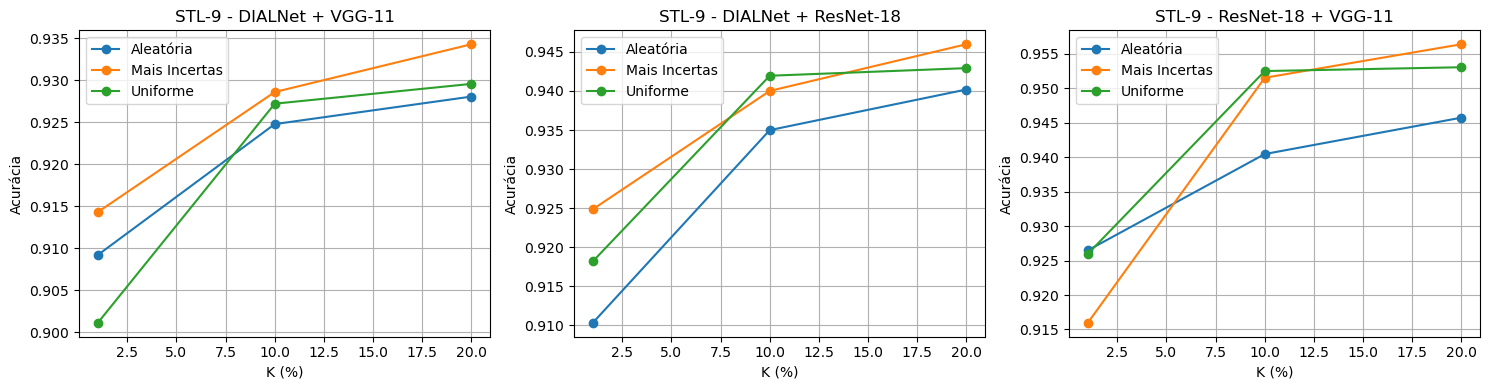

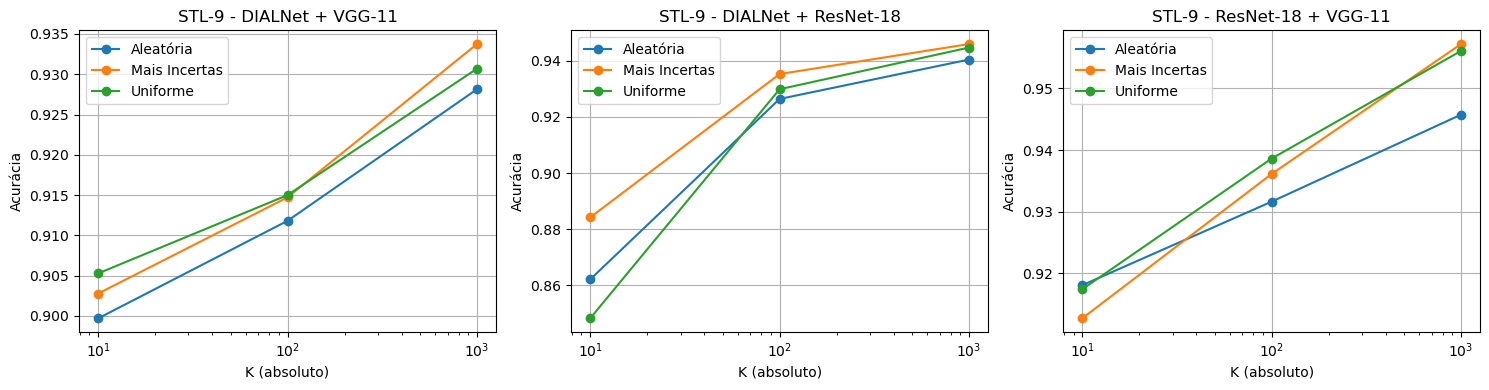

In [131]:

strategy_stl9_dialnet_vgg11, strategy_stl9_dialnet_vgg11_newTask = selecionar_dados(df_stl9_dialnet_vgg11, df_stl9_dialnet_newTask)
strategy_stl9_dialnet_resnet18, strategy_stl9_dialnet_resnet18_newTask = selecionar_dados(df_stl9_dialnet_resnet18, df_stl9_dialnet_resnet18_newTask)
strategy_stl9_resnet18_vgg11, strategy_stl9_resnet18_vgg11_newTask = selecionar_dados(df_stl9_resnet18_vgg11, df_stl9_resnet18_vgg11_newTask)

plot_acuracias(
    strategy_stl9_dialnet_vgg11,
    strategy_stl9_dialnet_resnet18,
    strategy_stl9_resnet18_vgg11,
    title_prefix1="STL-9 - DIALNet + VGG-11",
    title_prefix2="STL-9 - DIALNet + ResNet-18",
    title_prefix3="STL-9 - ResNet-18 + VGG-11"
)


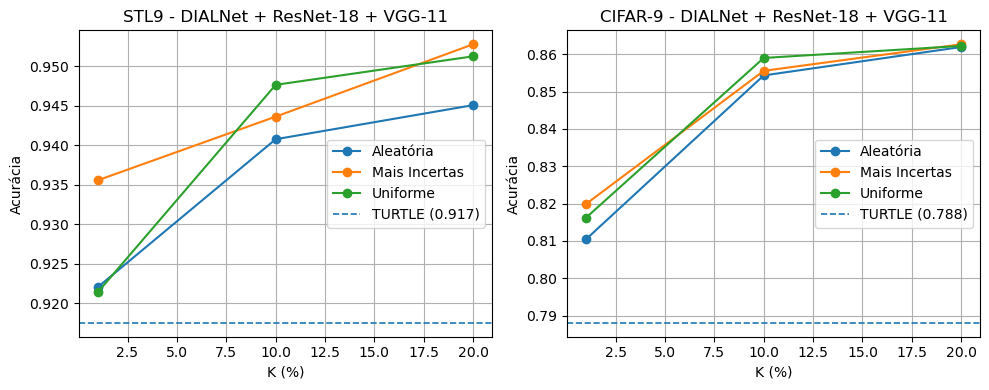

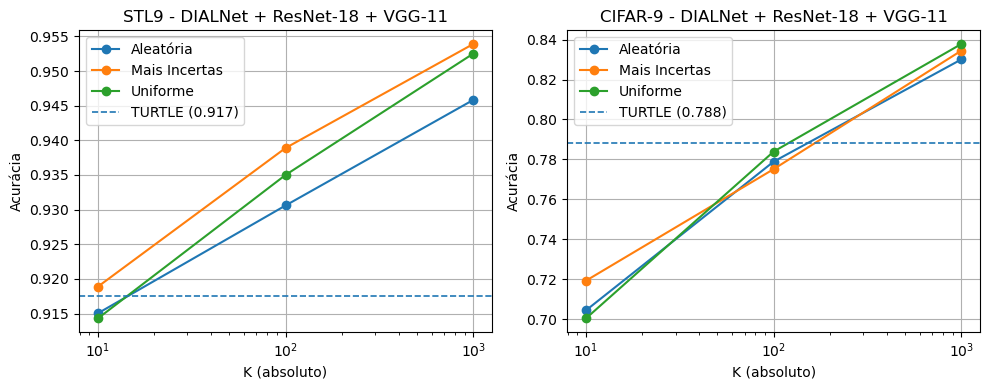

In [133]:
strategy_stl9_dialnet_resnet18_vgg11, strategy_stl9_dialnet_resnet18_vgg11_newTask = selecionar_dados(df_stl9_dialnet_resnet18_vgg11, df_stl9_dialnet_resnet18_vgg11_newTask)
strategy_cifar9_dialnet_resnet18_vgg11, strategy_cifar9_dialnet_resnet18_vgg11_newTask = selecionar_dados(df_cifar9_dialnet_resnet18_vgg11, df_cifar9_dialnet_resnet18_vgg11_newTask)


plot_acuracias(
    strategy_stl9_dialnet_resnet18_vgg11,
    strategy_cifar9_dialnet_resnet18_vgg11,

    title_prefix1="STL9 - DIALNet + ResNet-18 + VGG-11",
    title_prefix2="CIFAR-9 - DIALNet + ResNet-18 + VGG-11",
    
		baseline1=acc_stl9_dialnet_vgg11,
    baseline2=acc_cifar9_dialnet_resnet18,
)



## Tabela

Resumo das acurácias obtidas a partir do ajuste fino, considerando diferentes arquiteturas, conjuntos de dados e níveis de seleção (k=1%, k=10%, k=20%)

In [135]:
def compute_acc_list(strategies, method, pct):
    """Retorna lista de acurácias para várias estratégias."""
    accs = []
    for strat in strategies:
        result = strat['acc'][(strat['strategy'] == method) & (strat['K'] == f"Kpct_{pct}")]
        accs.append(result.values[0])
    return accs

In [137]:
strategies_stl9 = [
    strategy_stl9_resnet18,
    strategy_stl9_vgg11,
    strategy_stl9_dialnet,
    strategy_stl9_resnet18_vgg11,
    strategy_stl9_dialnet_resnet18,
    strategy_stl9_dialnet_vgg11,
    strategy_stl9_dialnet_resnet18_vgg11,
]


In [138]:
acc_stl9_pct1_uniform   = compute_acc_list(strategies_stl9, "uniform",   pct=1)
acc_stl9_pct1_uncertain = compute_acc_list(strategies_stl9, "uncertain", pct=1)
acc_stl9_pct1_random    = compute_acc_list(strategies_stl9, "random",    pct=1)

acc_stl9_pct10_uniform   = compute_acc_list(strategies_stl9, "uniform",   pct=10)
acc_stl9_pct10_uncertain = compute_acc_list(strategies_stl9, "uncertain", pct=10)
acc_stl9_pct10_random    = compute_acc_list(strategies_stl9, "random",    pct=10)

acc_stl9_pct20_uniform   = compute_acc_list(strategies_stl9, "uniform",   pct=20)
acc_stl9_pct20_uncertain = compute_acc_list(strategies_stl9, "uncertain", pct=20)
acc_stl9_pct20_random    = compute_acc_list(strategies_stl9, "random",    pct=20)



In [139]:
strategies_cifar9 = [
    strategy_cifar9_resnet18,
    strategy_cifar9_vgg11,
    strategy_cifar9_dialnet,
    strategy_cifar9_resnet18_vgg11,
    strategy_cifar9_dialnet_resnet18,
    strategy_cifar9_dialnet_vgg11,
    strategy_cifar9_dialnet_resnet18_vgg11,
]


In [140]:
acc_cifar9_pct1_uniform   = compute_acc_list(strategies_cifar9, "uniform",   pct=1)
acc_cifar9_pct1_uncertain = compute_acc_list(strategies_cifar9, "uncertain", pct=1)
acc_cifar9_pct1_random    = compute_acc_list(strategies_cifar9, "random",    pct=1)

acc_cifar9_pct10_uniform   = compute_acc_list(strategies_cifar9, "uniform",   pct=10)
acc_cifar9_pct10_uncertain = compute_acc_list(strategies_cifar9, "uncertain", pct=10)
acc_cifar9_pct10_random    = compute_acc_list(strategies_cifar9, "random",    pct=10)

acc_cifar9_pct20_uniform   = compute_acc_list(strategies_cifar9, "uniform",   pct=20)
acc_cifar9_pct20_uncertain = compute_acc_list(strategies_cifar9, "uncertain", pct=20)
acc_cifar9_pct20_random    = compute_acc_list(strategies_cifar9, "random",    pct=20)


In [143]:
data_cifar9 = {
    
	"Modelo": [
        "ResNet-18",
        "VGG-11",
        "DialNet",
        "ResNet-18 + VGG-11",
        "DialNet + ResNet-18",
        "DialNet + VGG-11",
        "DialNet + ResNet-18 + VGG-11"
    ],
    
	"CIFAR-9": acc_cifar9,
            
	"(random - K=1%)": acc_cifar9_pct1_random,
	"(random - K=10%)": acc_cifar9_pct10_random,
	"(random - K=20%)": acc_cifar9_pct20_random,     


	"(toprank - K=1%)": acc_cifar9_pct1_uncertain,
	"(toprank - K=10%)": acc_cifar9_pct10_uncertain,
	"(toprank - K=20%)": acc_cifar9_pct20_uncertain,  
	
	"(uniform - K=1%)": acc_cifar9_pct1_uniform,
	"(uniform - K=10%)": acc_cifar9_pct10_uniform,
	"(uniform - K=20%)": acc_cifar9_pct20_uniform,

}

df = pd.DataFrame(data_cifar9)
display(df)

,Modelo,CIFAR-9,(random - K=1%),(random - K=10%),(random - K=20%),(toprank - K=1%),(toprank - K=10%),(toprank - K=20%),(uniform - K=1%),(uniform - K=10%),(uniform - K=20%)
0,ResNet-18,0.7326,0.795089,0.843689,0.850322,0.787889,0.832889,0.842111,0.808222,0.843444,0.847222
1,VGG-11,0.5187,0.705111,0.805133,0.817411,0.648667,0.783333,0.803000,0.687222,0.791333,0.805667
2,DialNet,0.6616,0.663600,0.668467,0.669422,0.666222,0.668444,0.668444,0.667444,0.671000,0.670111
3,ResNet-18 + VGG-11,0.6239,0.758089,0.829233,0.838844,0.731556,0.812556,0.829556,0.751556,0.825889,0.835667
4,DialNet + ResNet-18,0.7881,0.814367,0.840544,0.844311,0.812889,0.841778,0.844778,0.816778,0.843444,0.848444
5,DialNet + VGG-11,0.7417,0.774700,0.809011,0.815122,0.781333,0.807667,0.814111,0.784333,0.814556,0.817444
6,DialNet + ResNet-18 + VGG-11,0.7677,0.810444,0.854322,0.861933,0.819889,0.855556,0.862667,0.816222,0.859000,0.862222


In [145]:
data_stl9 = {
    "Modelo": [
        "ResNet-18",
        "VGG-11",
        "DialNet",
        "ResNet-18 + VGG-11",
        "DialNet + ResNet-18",
        "DialNet + VGG-11",
        "DialNet + ResNet-18 + VGG-11"
    ],
    "STL-9": acc_stl9,
    
		"(random - K=1%)": acc_stl9_pct1_random,
    "(random - K=10%)": acc_stl9_pct10_random,
    "(random - K=20%)": acc_stl9_pct20_random,
    
    "(toprank - K=1%)": acc_stl9_pct1_uncertain,
  	"(toprank - K=10%)": acc_stl9_pct10_uncertain,
    "(toprank - K=20%)": acc_stl9_pct20_uncertain,

    "(uniform - K=1%)": acc_stl9_pct1_uniform,
    "(uniform - K=10%)": acc_stl9_pct10_uniform,
    "(uniform - K=20%)": acc_stl9_pct20_uniform,


}


df = pd.DataFrame(data_stl9)
display(df)


,Modelo,STL-9,(random - K=1%),(random - K=10%),(random - K=20%),(toprank - K=1%),(toprank - K=10%),(toprank - K=20%),(uniform - K=1%),(uniform - K=10%),(uniform - K=20%)
0,ResNet-18,0.9335,0.919069,0.939903,0.943583,0.929028,0.946806,0.953750,0.915278,0.947083,0.949861
1,VGG-11,0.9163,0.910694,0.922278,0.927292,0.910972,0.931528,0.933611,0.911806,0.930556,0.932500
2,DialNet,0.7890,0.754583,0.790458,0.794792,0.763056,0.791528,0.794444,0.757083,0.790417,0.796250
3,ResNet-18 + VGG-11,0.9364,0.926486,0.940458,0.945736,0.915972,0.951528,0.956389,0.925972,0.952500,0.953056
4,DialNet + ResNet-18,0.9285,0.910333,0.934986,0.940181,0.924861,0.940000,0.945972,0.918194,0.941944,0.942917
5,DialNet + VGG-11,0.9175,0.909194,0.924792,0.928069,0.914306,0.928611,0.934306,0.901111,0.927222,0.929583
6,DialNet + ResNet-18 + VGG-11,0.9363,0.922028,0.940750,0.945069,0.935556,0.943611,0.952778,0.921389,0.947639,0.951250


In [146]:


data = {
    "Modelo": [
        "CoDIAL",
        "Random",
        "Toprank Entropy",
        "Uniform Entropy",
    ],
    "STL-9": [
        0.8106,
        0.8190,
        0.8229,
        0.8244

    ],
    "CIFAR-9": [
        0.7148,
        0.7858,
        0.7953,
        0.8033
    ]
}
df = pd.DataFrame(data)
display(df)



,Modelo,STL-9,CIFAR-9
0,CoDIAL,0.8106,0.7148
1,Random,0.8190,0.7858
2,Toprank Entropy,0.8229,0.7953
3,Uniform Entropy,0.8244,0.8033
